# Game, Clock, Guess
### Predicting Tennis Match Length Based on Player ELO Point Difference

By Group 29 of section 007

<img src="https://www.atptour.com/-/media/images/news/2022/11/24/21/58/alcaraz-sinner-best-of-2022-grand-slam-matches.jpg"/> 

## Introduction

In tennis, a unique aspect of the game is the duration of the matches. The average men’s tennis matches last between 1.5 to 5 hours. The unpredictability within the sport allows a match that was expected to end fast to become lengthy. The expectancy that one has, comes from the tennis players’ rankings. For professional men’s tennis, there’s the Association of Tennis Professionals (ATP): a point system based on the tennis season. The points given depend on the tournament’s difficulty. Tournaments known as “Grand Slams” are given more points compared to tournaments like ATP Tour Masters. A player gains more points when they win. There’s a correlation between tennis player rankings and the length of the tennis match, as one may believe when there’s a greater rank difference between players, the tennis match length is shorter - hence why earlier tournament rounds have shorter match length averages. It’s important to understand the correlation to better manage the tournament regarding the match scheduling. One could ask: based on the difference in rank between the winner and loser of a tennis match, can we predict the length of a game? This correlation also helps within a player’s performance analysis to see who and when a player dominates throughout their matches - a statistic for coaches, players, and fans to have a deeper understanding of the game dynamics. In order to display this correlation, the dataset used displays the Men’s ATP tennis matches through 2017 - 2019, specifically looking at the winner and loser ranks, rank differences, and match length for each match within each tournament. In determining this, a factor that was also used was the ELO of each player, and the difference between them. ELO is a numerical rating system for each player that depends on their wins, loses, and draws. This system helps analyze the competitors and predict the match outcomes. All of these factors together, help to understand the correlation. This dataset allows us to visualize the correlation between tennis rankings and match lengths. 

## Methods

In order to conduct our data analysis, we are focusing on regression. A regression model predicts a new observation’s response variable based on the response variables for similar observations in the data set of past observations. From the data set, “game_results.csv” we are using the “winner_rank_points” column and the “loser_rank_points” column in order to find the difference between the ELO points of the winner and loser of each match. Additionally, we are using the column “minutes” to see the length of matches, and the “best_of” column (the data was limited to matches that were only best out of 3 because the matches out of 5+ would most likely be longer and interfere with the analysis). Slight changes were made to the data through mutations and arranging the data to create “transformed_game.” This included the “hours” column to know the duration of each total match, and the “point_diff” column to more easily quantify the the difference of ELO points between players. We found that these columns were necessary as they provided factors that could be used to predict future matches, like the columns “winner_rank_points,” “loser_rank_points.” The “point_diff” column takes it a step further to show the correlation between these columns. All the columns hold relevant information to our regression analysis that helps to predict the outcomes and understand the correlations within matches.

We will now need to read and organize the data table to be understood. This is done through wrangling and cleaning the data through splitting, training, and testing the data. This is important to do because cleaning the data is essential to ensuring accuracy and completeness of the model and data to evaluate and analyze. Cleaning the data allows for errors, outliers, and inconsistencies to be removed. After cleaning the data, we are left with more accurate data that is easier to comprehend, analyze, and later use to model and visualize. An example of cleaning this data was our work of removing one of the samples that was a 16 hour game because of how big of an outlier it was as the next longest was about 5 hours less. Furthermore, this game may have also been measured wrong as when researched. The longest match was 11 hours (a match in 2010). 
. 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
library(readr)
library(dplyr)
source("tests.R")
source("cleanup.R")

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


### Wrangling and Cleaning the Data

In [4]:
#reading the dataset
url_2017 <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv"
url_2018 <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv"
url_2019 <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv"

atp_matches_2017 <- read_csv(url_2017)
atp_matches_2018 <- read_csv(url_2018)
atp_matches_2019 <- read_csv(url_2019)

game <- bind_rows(atp_matches_2017, atp_matches_2018, atp_matches_2019)
game

Rows: 2911 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2897 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2806 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tou

tourney_id tourney_name surface draw_size tourney_level tourney_date
1    2017-M020  Brisbane     Hard    32        A             20170102    
2    2017-M020  Brisbane     Hard    32        A             20170102    
3    2017-M020  Brisbane     Hard    32        A             20170102    
⋮    ⋮          ⋮            ⋮       ⋮         ⋮             ⋮           
8612 2019-9210  Laver Cup    Hard    8         A             20190920    
8613 2019-9210  Laver Cup    Hard    8         A             20190920    
8614 2019-9210  Laver Cup    Hard    8         A             20190920    
     match_num winner_id winner_seed winner_entry ⋯ l_1stIn l_1stWon l_2ndWon
1    271       104678    NA          NA           ⋯ 53      33       13      
2    272       106378    NA          NA           ⋯ 67      39       27      
3    273       106298     6          NA           ⋯ 42      29       16      
⋮    ⋮         ⋮         ⋮           ⋮            ⋱ ⋮       ⋮        ⋮       
8612 107       104745    NA          NA           ⋯ NA      NA       NA      
8613 108       106233    NA          NA           ⋯ NA      NA       NA      
8614 109       106058    NA          NA           ⋯ NA      NA       NA      
     l_SvGms l_bpSaved l_bpFaced winner_rank winner_rank_points loser_rank
1    11      6         10        29          1385               100       
2    12      9         10        45          1001               141       
3    12      0          4        15          2156                25       
⋮    ⋮       ⋮         ⋮         ⋮           ⋮                  ⋮         
8612 NA      NA        NA          2         9225               24        
8613 NA      NA        NA          5         4575               33        
8614 NA      NA        NA        210          235               11        
     loser_rank_points
1     604             
2     443             
3    1585             
⋮    ⋮                
8612 1450             
8613 1310             
8614 2475

In [6]:
set.seed(2020)
#wrangling and summarizing the data

#selected and created the necessary columns and arranged by descending rank difference while removing hour and point_diff rows with NA values
#calculated the absolute ELO (point) difference between winners and losers to obtain point_diff
transformed_game <- select(game, winner_rank_points, loser_rank_points, minutes, best_of) |>
                    filter(best_of == 3) |> 
                    mutate(hours = minutes/60, point_diff = abs(winner_rank_points - loser_rank_points)) |>
                    arrange(desc(hours)) |>
                    slice(-1) |>
                    drop_na(hours, point_diff)
transformed_game
#used slice(-1) because the longest game in the original dataset was 987 minutes/16.45 hours, but the longest record is only 11 hours and 5 minutes
#this match was also supposedly in 2010, but this dataset consists of only matches from 2017-2019
#even if it were a real game, it's too much of an outlier to be used in the actual dataset and messes with the analysis

#splitting the transformed dataset into training and testing data
game_split <- initial_split(transformed_game, prop = 0.60, strata = minutes)
game_training <- training(game_split)
game_testing <- testing(game_split)

winner_rank_points loser_rank_points minutes best_of hours     point_diff
1    1295                588              289     3       4.816667  707       
2    1200               1685              244     3       4.066667  485       
3      14                348              230     3       3.833333  334       
⋮    ⋮                  ⋮                 ⋮       ⋮       ⋮         ⋮         
6578 4400                968              12      3       0.2000000 3432      
6579 2306                816              11      3       0.1833333 1490      
6580 1127               2825               8      3       0.1333333 1698

### Table 1: All games organized in order of game length
This figure showcases all the data necessary to perform the data analysis

We will now need to read and organize the data table to be understood. This is done through wrangling and cleaning the data through splitting, training, and testing the data. This is important to do because cleaning the data is essential to ensuring accuracy and completeness of the model and data wanted to be evaluated and analyzed. Cleaning the data allows for errors, outliers, and inconsistencies to be removed. After cleaning the data, we are left with more accurate data that is easier to comprehend, analyze, and later use to model and visualize. An example of cleaning this data was our work of removing one of the samples that was a 16-hour game because of how big of an outlier it was as the next longest was about 5 hours less. Furthermore, this game may have also been measured wrong as when researched, the longest match ever was actually just 11 hours (a match in 2010, not included in this dataset). 


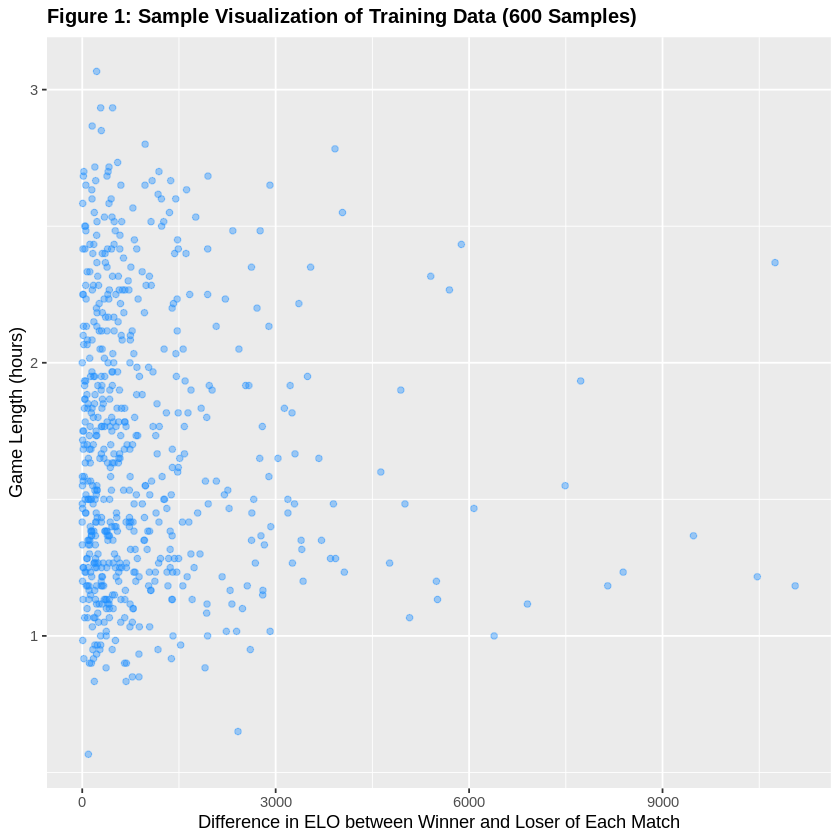

In [7]:
set.seed(2020)
#selecting 600 random samples out of the thousands or so present in the training set
#this helps declutter the dataset so that the relationship can be seen more clearly
game_samples <- game_training |>
                sample_n(600)

#visualizing the data so that we can see the relationship between the variables
game_plot_hours <- game_samples |>
                ggplot(aes(x = point_diff, y = hours)) +
                geom_point(color = 'dodgerblue', alpha = 0.4) +
                xlab("Difference in ELO between Winner and Loser of Each Match") +
                ylab("Game Length (hours)") +
                ggtitle("Figure 1: Sample Visualization of Training Data (600 Samples)") + 
                theme(plot.title = element_text(size = 12, face = "bold"))
game_plot_hours

In order to predict the length of a match based on individual rank, we are choosing to visualize our data analysis using the ggplot function to create scatter plots comparing the Difference of Ranking (ELO) between Winners and Losers of Matches (x-axis) and Game Length in Hours (y-axis). By visualizing our chosen data, it will allow us to examine the trends/patterns. To take a closer look at the trends within the data, we will be using a sample of about 600 randomized matches throughout 2017 and 2019 to see the correlation. What was to be expected was a positive increasing trend between the axes as the difference in ELO continued to increase, the match length would also increase. However Figure 1 shows that this was not exactly the case, there was no increasing trend to be found. Many of the points in this sample clustered to x = 0 and varied in game length. 


### Performing the Data Analysis

To perform the data analysis, we used regression which is a way of modeling a relationship between variables to understand the changes made. It predicts a new observation’s response variable based on the response variables for similar observations in the data set of past observations. We are using regression for our analysis because its purpose fits our goal of this project - to understand the correlation between match length and player ranking difference. Based on the data and our aim of positive trending data, we then used linear regression to build the model using “linear_reg()”
We then created a recipe that used the data that we had initially trained earlier. This involves fitting the model which helps to estimate the regression equation and coefficients involved to see the relation in the variables.
 
 plot. 


In [8]:
#building the linear regression model
game_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

#making the recipe and workflow
game_recipe <- recipe(hours ~ point_diff, data=game_training)

game_fit <- workflow() |>
            add_recipe(game_recipe) |>
            add_model(game_spec) |>
            fit(data = game_training)

game_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)   point_diff  
  1.662e+00   -5.347e-06  


#### Continuation of paragraph
Using the model, we are then able to make predictions - while still using the trained data from before. Figure 1 displays the data that was then plotted to see the linear predictions - called “lm_predictions.”

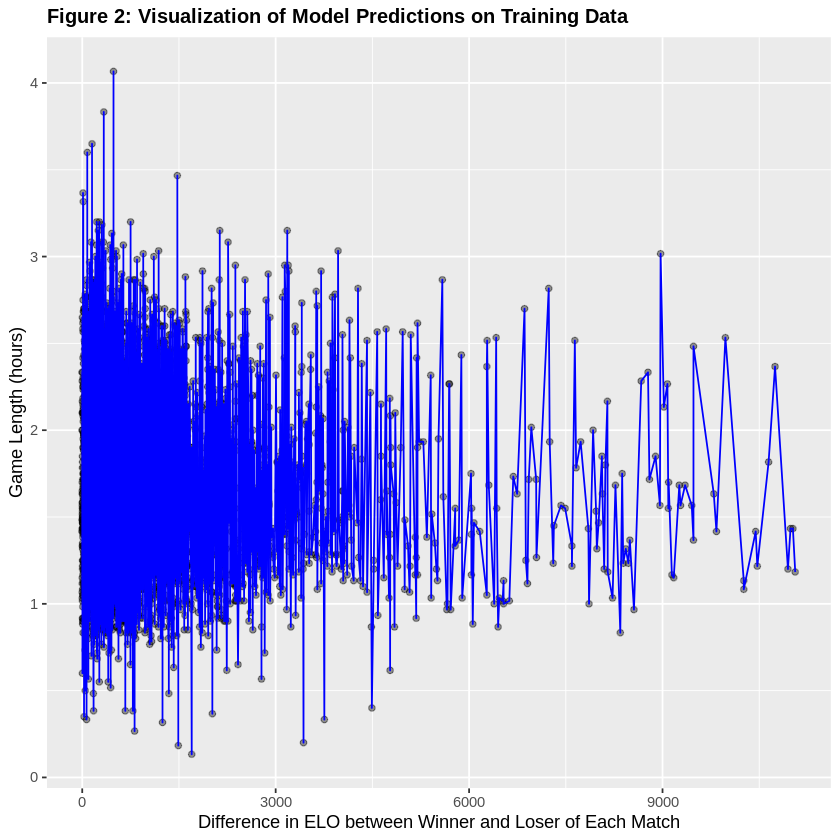

In [9]:
set.seed(2020)
#visualizing model predictions
game_preds <- game_fit |>
   predict(game_training) |>
   bind_cols(game_training)

lm_predictions <- game_preds |>
    ggplot(aes(x = point_diff, y = hours)) +
         geom_point(alpha = 0.4) +
         geom_line(mapping = aes(x = point_diff, y = hours), color = "blue") +
         xlab("Difference in ELO between Winner and Loser of Each Match") +
         ylab("Game Length (hours)") +
         ggtitle("Figure 2: Visualization of Model Predictions on Training Data") + 
         theme(plot.title = element_text(size = 12, face = "bold"))
lm_predictions

In [10]:
#creating line of best fit


#using game_fit to make predictions on the testing data
lm_test_results <- game_fit |>
                    predict(game_testing) |>
                    bind_cols(game_testing) |>
                    metrics(truth = hours , estimate = .pred)

#collecting metrics and extracting rmspe
lm_rmspe <- lm_test_results |>
                filter(.metric == "rmse") |>
                pull()
lm_rmspe

[1] 0.5204765

#### Coninuation of Paragraph

One is then able to create a line of best fit from the data. This is done through using the tested data now, and making predictions on it - which created “lm_test_results”. We were then able to collect metrics, like the RMPSE (Root Mean Percentage Squared Error) which measures the prediction’s accuracy through looking at the average squared difference between predicted and actual values. The line of best fit based on the model training data is shown in Figure 1 which visualizes the data on a scatter plot.

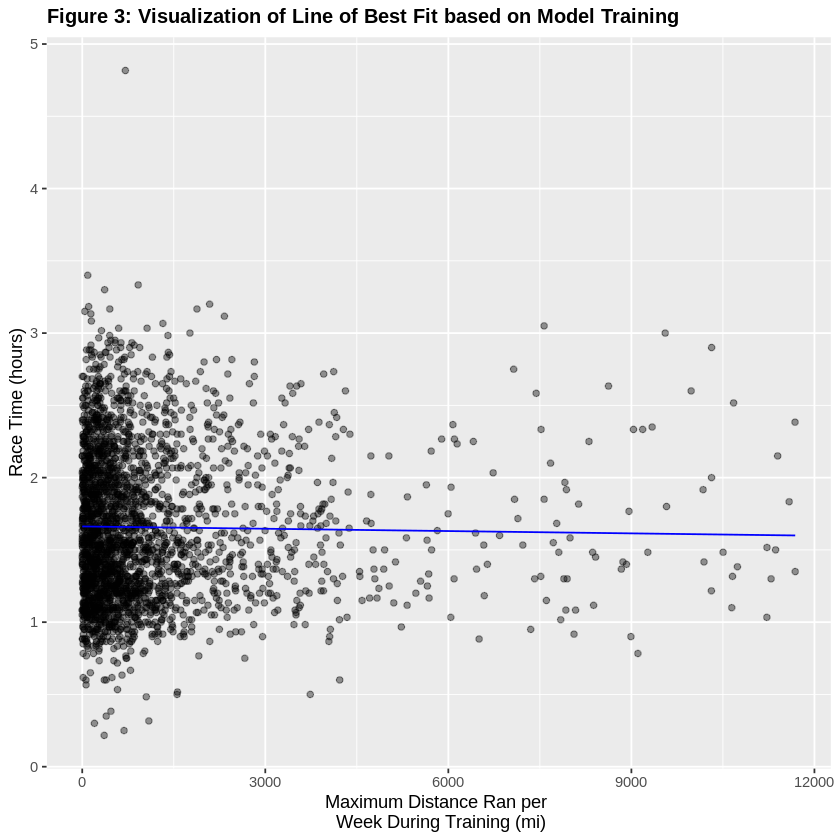

In [13]:
set.seed(2020)
# visualizing the model as a straight line on the test data
test_preds <- game_fit |>
    predict(game_testing) |>
    bind_cols(game_testing)

lm_predictions_test <- test_preds |>
    ggplot(aes(x = point_diff, y = hours)) +
        geom_point(alpha = 0.4) +
        geom_line(
            mapping = aes(x = point_diff, y = .pred), 
            color = "blue") +
        xlab("Maximum Distance Ran per \n Week During Training (mi)") +
        ylab("Race Time (hours)") +
        ggtitle("Figure 3: Visualization of Line of Best Fit based on Model Training") + 
        theme(plot.title = element_text(size = 12, face = "bold"))

lm_predictions_test

## Discussion
In summary, our analysis showed the relation between tennis player rankings through their points/ELO ranking and the duration of the match lengths. This was done by using the method of regression. What was expected of this graph was a positive trend that would be shown based on the relations of the two factors, this was not seen. The visualized data showed varied match lengths regardless of the difference in ranking. This was very much not what we were expecting to find since there was no clear trend that we were able to see in our visualizations. This then allowed us to know that match lengths vary widely despite ranking differences, which suggests that other factors also play a role in the duration of a match. The impact of this is shown in our newfound understanding of the lack of correlation between the difference in player rankings and match lengths. This can be used for tournament management and analyzing the performance of players. A fan and viewer of tennis is able to not just assume that a match between a highly ranked player and an unseeded player will be an easy or quick match. Our findings then prompt the question of what factors do influence match duration - is there a sole factor that heavily influences it or is it just one factor? This also highlighted the limitations of using solely ranking differences to predict the duration of the matches. This project could also lead to future questions being asked which include determining the additional factors that influence match lengths, these could include court surface (clay, grass, etc), the players’ age difference, or more. Further investigation into this topic could determine the factors influencing match lengths and refine predictive models to aid in tennis management and predictions for analysts, players coaches, and fans all over the world. 

## Bibliography

Nag, U. (2022, April 5). Tennis rankings: Everything you need to know. Olympics. https://olympics.com/en/news/tennis-rankings-atp-wta-men-women-doubles-singles-system-grand-slam-olympics 

Sampson, M. (2023, January 5). How long is a tennis match: Average match time explained. Tennis Universe. https://tennisuniverse.org/how-long-is-tennis-match/ 

Dataset downloaded from https://github.com/JeffSackmann